# Auswertung 200213_3

In [2]:
#imports
import matplotlib.pyplot as plt
from readTrc import Trc
import numpy as np
import h5py
import json
from datetime import *
from os import listdir
from os.path import abspath, isfile, join
import re
from scipy.optimize import curve_fit
import math

In [4]:
#folder
folder = "200213_3"
folderPath = join("..\\Rohdaten", folder)

{'INSTRUMENT_NAME': 'LECROYWP760Zi-A', 'INSTRUMENT_NUMBER': 47498, 'TRACE_LABEL': '', 'WAVE_ARRAY_COUNT': 82, 'PNTS_PER_SCREEN': 80, 'FIRST_VALID_PNT': 0, 'LAST_VALID_PNT': 81, 'FIRST_POINT': 0, 'SPARSING_FACTOR': 1, 'SEGMENT_INDEX': 0, 'SUBARRAY_COUNT': 1, 'SWEEPS_PER_ACQ': 1, 'POINTS_PER_PAIR': 0, 'PAIR_OFFSET': 0, 'VERTICAL_GAIN': 2.7743299142457545e-06, 'VERTICAL_OFFSET': 0.03999999910593033, 'MAX_VALUE': 28580.0, 'MIN_VALUE': -28836.0, 'NOMINAL_BITS': 8, 'NOM_SUBARRAY_COUNT': 1, 'HORIZ_INTERVAL': 2.50000003337858e-11, 'HORIZ_OFFSET': 9.94608158029831e-09, 'PIXEL_OFFSET': 9.96e-09, 'VERTUNIT': 'V', 'HORUNIT': 'S', 'HORIZ_UNCERTAINTY': 9.999999960041972e-13, 'TRIGGER_TIME': datetime.datetime(2020, 2, 13, 15, 22, 15, 716851), 'ACQ_DURATION': 0.0, 'RECORD_TYPE': 'single_sweep', 'PROCESSING_DONE': 'no_processing', 'RIS_SWEEPS': 1, 'TIMEBASE': '200_ps/div', 'VERT_COUPLING': 'DC_50_Ohms', 'PROBE_ATT': 1.0, 'FIXED_VERT_GAIN': '20_mV/div', 'BANDWIDTH_LIMIT': False, 'VERTICAL_VERNIER': 1.0,

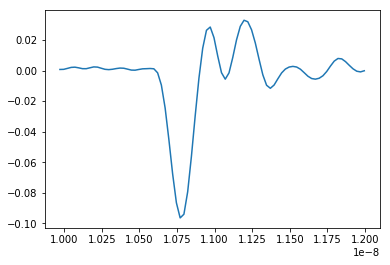

In [129]:
#read single TRC
sglFn = "C1Trace00012.trc"

sglTrc = Trc()
sglTrc.open(join(folderPath, sglFn))
plt.plot(sglTrc.x, sglTrc.y)

print(sglTrc.d)

{'INSTRUMENT_NAME': 'LECROYWP760Zi-A', 'INSTRUMENT_NUMBER': 47498, 'TRACE_LABEL': '', 'WAVE_ARRAY_COUNT': 82, 'PNTS_PER_SCREEN': 80, 'FIRST_VALID_PNT': 0, 'LAST_VALID_PNT': 81, 'FIRST_POINT': 0, 'SPARSING_FACTOR': 1, 'SEGMENT_INDEX': 0, 'SUBARRAY_COUNT': 1, 'SWEEPS_PER_ACQ': 1, 'POINTS_PER_PAIR': 0, 'PAIR_OFFSET': 0, 'VERTICAL_GAIN': 2.7743299142457545e-06, 'VERTICAL_OFFSET': 0.03999999910593033, 'MAX_VALUE': 28580.0, 'MIN_VALUE': -28836.0, 'NOMINAL_BITS': 8, 'NOM_SUBARRAY_COUNT': 1, 'HORIZ_INTERVAL': 2.50000003337858e-11, 'HORIZ_OFFSET': 9.952863189493714e-09, 'PIXEL_OFFSET': 9.96e-09, 'VERTUNIT': 'V', 'HORUNIT': 'S', 'HORIZ_UNCERTAINTY': 9.999999960041972e-13, 'TRIGGER_TIME': datetime.datetime(2020, 2, 13, 15, 22, 15, 716851), 'ACQ_DURATION': 0.0, 'RECORD_TYPE': 'single_sweep', 'PROCESSING_DONE': 'no_processing', 'RIS_SWEEPS': 1, 'TIMEBASE': '200_ps/div', 'VERT_COUPLING': 'DC_50_Ohms', 'PROBE_ATT': 1.0, 'FIXED_VERT_GAIN': '20_mV/div', 'BANDWIDTH_LIMIT': False, 'VERTICAL_VERNIER': 1.0

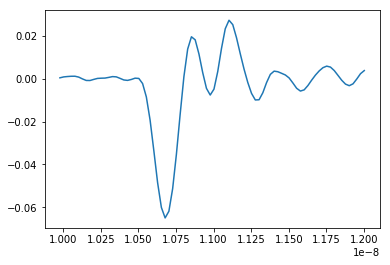

In [128]:
#read single TRC
sglFn = "C3Trace00012.trc"

sglTrc = Trc()
sglTrc.open(join(folderPath, sglFn))
plt.plot(sglTrc.x, sglTrc.y)

print(sglTrc.d)

In [33]:
#playground
C1 = np.array([[1,2,3,4,5,6]])
C1 = np.append(C1, [[6,5,4,3,2,1]], axis=0)
print(C1)
print(C1[0,4:6])

[[1 2 3 4 5 6]
 [6 5 4 3 2 1]]
[5 6]


In [87]:
#playground
C1 = np.array([[[1,2,3],[4,5,6]]])
C1 = np.append(C1, [[[6,5,4],[3,8,1]]], axis=0)
print(C1)
print("---")
print(C1[1])

[[[1 2 3]
  [4 5 6]]

 [[6 5 4]
  [3 8 1]]]
---
[[6 5 4]
 [3 8 1]]


In [136]:
# read all traces C1
#-> save to C1
channel = "C1"

C1 = {"data": [],
      "meta": []
}
for fn in listdir(folderPath):
    if(re.match(r"^" + channel + "Trace[0-9]{5}\.trc$", fn)):
        trc = Trc()
        trc.open(join(folderPath, fn))
        C1["data"].append(np.array((trc.x, trc.y)))
        C1["meta"].append(trc.d)
        
        #plt.plot(trc.x, trc.y)



In [149]:
#gauss function

def realGaussian(x, A, mu = None, sigma = None):
    if(mu == None):
        A, mu, sigma = A
    return A * np.exp(-np.power((x - mu) / sigma, 2) / 2) / (sigma * math.sqrt(2 * math.pi))

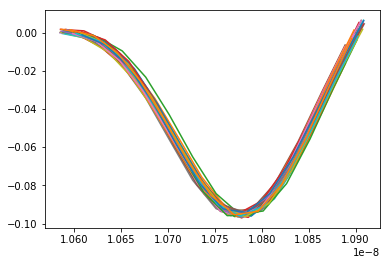

In [182]:
#print(C1[1])
minVal = 25
maxVal = 38
i = 0
for shot in C1["data"]:
    plt.plot(shot[0][minVal:maxVal], shot[1][minVal:maxVal])
    i += 1
    if(i>51):
        break

In [168]:
#fit gaussian C1
minVal = 25
maxVal = 38

C1["fit"] = []

for shot in C1["data"]:
    gaussParameters = [-0.1, 1.078e-8, 5e-11] # [A, mu, sigma]
    x = C1["data"][12][0][minVal:maxVal]
    y = C1["data"][12][1][minVal:maxVal]

    fit_params, var_matrix = curve_fit(realGaussian, shot[0][minVal:maxVal], shot[1][minVal:maxVal], p0 = gaussParameters)
    C1["fit"].append(fit_params)


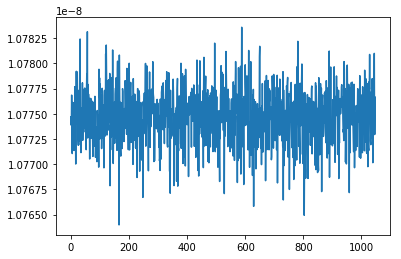

In [177]:
fits = np.array(C1["fit"])
plt.plot(fits[:,1])

In [163]:
fit_params

array([-1.53089232e-11,  1.07760988e-08,  6.13218211e-11])

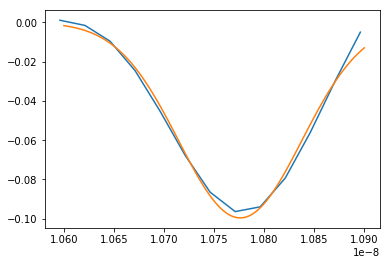

In [167]:
xfit = np.linspace(1.06e-8, 1.09e-8, 100)
yfit = realGaussian(xfit, fit_params)
plt.plot(x, y)
plt.plot(xfit, yfit)